#### 깡통 모델 만들기

In [1]:
import importlib
import Image_Process_utils
importlib.reload(Image_Process_utils)
from Image_Process_utils import *

current path: C:\Users\NormalKim\[0_BigData_Acu]\Acupuncture-Points\CV_DeepLearning
current path: C:\Users\NormalKim\[0_BigData_Acu]\Acupuncture-Points\CV_DeepLearning


In [2]:
import torchvision.models as models
from torchvision.models.resnet import ResNet, BasicBlock, Bottleneck
import torch.nn as nn
from torchsummary import summary
from PIL import Image
from PIL import ImageDraw
from model_utils import *
from matplotlib.lines import Line2D

In [3]:
from Training_utils import *
import time
from torch.utils.tensorboard import SummaryWriter
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
import torchvision

In [ ]:
# cuda 로 안 바꾸고 cpu로 집어넣고 순전파 테스트
model50 = MyResNet(block = BasicBlock, cfg = [3,4,6,3]) # 레즈넷 50
model50.forward(torch.randn(1,3,224,224))

In [ ]:
# cuda로 바꾸면 summary 를 보여주기 가능 
#model50 = MyResNet(block = BasicBlock, cfg = [3,4,6,3]).to('cuda')
summary(model50.to('cuda'), input_size = (3, 224, 224), device = 'cuda') # 파라미터 ~21.2 M 

#### 데이터 로더

In [4]:
from tb_utils import *

In [6]:
os.chdir('./color_mnist2')

In [5]:
os.listdir()

['.gitignore',
 '.ipynb_checkpoints',
 'Acu_Dataset',
 'color_mnist2',
 'create_new_mnist.ipynb',
 'dataset',
 'GAN_utils.py',
 'Hands.ipynb',
 'Hands_sobu',
 'Image_Process_utils.py',
 'lena.png',
 'mnist.csv',
 'mnist_eda.R',
 'model_utils.py',
 'Quick_Check_File_Tag.ipynb',
 'README.md',
 'tb_utils.py',
 'Test_Hand_Dataset.ipynb',
 'Toy_Model_Mnist_GAN.ipynb',
 'Toy_Model_Mnist_Regression.ipynb',
 'Training_utils.py',
 'validation_set_simul.R',
 '__pycache__',
 '뒤.jpg',
 '앞.jpg']

In [ ]:
os.chdir('./color_mnist2')

In [7]:
#데이터 불러오기 
# dir : 'C:\\Users\\NormalKim\\[0_GAN]\\color_mnist2'
image_size = 224
batch_size = 32
my_transforms = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    #transforms.Normalize((0.5,), (0.5,)),
    ])

train_dir = './train/original'
test_dir = './test/original'
train_set = CoordDataSet(json_file = './color_mnist_train.json', rootdir = train_dir, transform = my_transforms )
test_set = CoordDataSet(json_file = './color_mnist_test.json', rootdir = test_dir, transform = my_transforms )

train_loader = DataLoader(train_set, batch_size = 32, shuffle = False)
test_loader = DataLoader(test_set, batch_size = 32, shuffle = False)

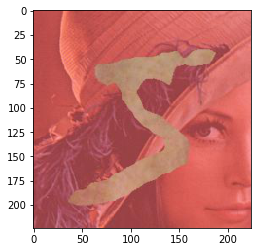

In [8]:
import matplotlib.pyplot as plt
plt.imshow(np.transpose(iter(train_loader).__next__()[0][0], (1,2,0)))

In [ ]:
iter(train_loader).__next__()[1]

In [ ]:
#target = iter(train_loader).__next__()[1]
out1, out2 = model50.forward(torch.randn(32,3,224,224).to('cuda'))

In [ ]:
nn.CrossEntropyLoss()(out1, target[0])

In [ ]:
nn.MSELoss()(out2[:,0], target[1])

In [ ]:
nn.MSELoss()(out2[:,1], target[2])

#### 트레이너 모듈 만들기

In [ ]:
writer_mnist = SummaryWriter(f'runs/col_mnist')

In [ ]:
from tb_utils import *

In [ ]:
targets[1]

In [ ]:
out2[0][0]

In [ ]:
targets

In [9]:
from torch.optim.lr_scheduler import StepLR

In [10]:
model = MyResNet(block = Bottleneck, cfg =  [3, 4, 23, 3]) # 레즈넷 101
model_name = 'ResNet101'
model.to('cuda')

MyResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1

In [ ]:
model = MyResNet(block = BasicBlock, cfg = [3,4,6,3]) # 레즈넷 5
model.to('cuda')

In [ ]:
str.replace()

In [13]:
tb_kw

'runs/ResNet101_08-10_02_05'

In [12]:
import datetime
import time

today_kw = str(datetime.datetime.now())[5:16].replace(" ", "_")
today_kw = today_kw.replace(":", "_")
tb_kw = 'runs/' + model_name + '_' +  today_kw

In [17]:
def betass(b = (1,2)):
    print(b)

betass()

(1, 2)


In [14]:
#model50 = model
#def trainer(learning_rate = 0.0001, momentum = 0.9, num_epochs = 10, lr_schedule = False)
# hyperparameters
# 1. Optimizer
learning_rate = 0.0001
momentum = 0.9 
num_epochs = 10
optimizer = torch.optim.Adam(model50.parameters(), lr = learning_rate, betas = (0.5, 0.999))

# 2. Criterion 
cls_loss = nn.CrossEntropyLoss()
mse_loss = nn.MSELoss()
# smooth l1: nn.SmoothL1Loss()
# dropout 

start_time = time.time()
history = []
total_time = 0

# 3. For loop
dataloader = train_loader

scheduler = StepLR(optimizer, step_size = 2, gamma = 0.5)
print('start training')
start = time.time()
for epoch in range(num_epochs):
    epoch_start = time.time()
   # print("Epoch: {}/{}".format(num_epochs+1, num_epochs))
    # set to train mode
    model50.train()
    
    #Timer
#    start = torch.cuda.Event(enable_timing=True)
#    end = torch.cuda.Event(enable_timing=True)
#    start.record()
    # loss

            
    train_loss = 0.0
    loss_monitor = []
    for batch_idx, (imgs, targets) in enumerate(dataloader):
       # imgs = imgs.to(torch.float32)
        targets = [ i.to(torch.float32).to('cuda') for i in targets]
        imgs = imgs.to('cuda')
        #targets = targets.to('cuda')

        optimizer.zero_grad()
        out1, out2 = model50(imgs)

      #  loss_cls = cls_loss(out1, targets[0] )
        loss_x = mse_loss(out2[:,0], targets[1] )
        loss_y = mse_loss(out2[:,1], targets[2] )
        loss =  loss_x + loss_y

        # backpropagation 
        loss.backward()

        # update parameters
        optimizer.step()

        # compute total loss
        #train_loss += loss.item() * imgs.size(0)
       #  print('avg loss: ', loss.item())
        loss_monitor.append(loss.item())
    
        if batch_idx == 1:
            end = time.time() 
            time_per_batch = end - start
            time_per_epoch = time_per_batch * len(dataloader)

        if (batch_idx % 10 == 0) & (batch_idx !=0):
            print(f'Epoch [{epoch+1} / {num_epochs}] Batch {batch_idx}/{len(dataloader)} '
                  f' Loss: {loss.item() :.3f} MAVLoss : {np.mean(loss_monitor):.3f}'
                  f' || Current Time: {str(datetime.datetime.now().time())[:8]}'
                  f' Time Left: {time_per_epoch*(num_epochs-epoch - batch_idx/len(dataloader))/60:.2f} min'
                 )
            with torch.no_grad():
              #  end.record()                    
                img_list = gen_train_monitor_plot(imgs, out2,x_ind =1, y_ind = 2, target = targets)
                imgs_grid = torchvision.utils.make_grid(img_list, normalize = True)
                writer = SummaryWriter(f'{tb_kw}') #name of this 
                writer.add_image('imgs', imgs_grid) 
                writer.flush()
        # class accuracy
    scheduler.step()
        # pixel accuracy 
        
        
        # tensorboard : with loss, img 
        
        
        

start training
Epoch [1 / 10] Batch 10/1875  Loss: 39959.605 MAVLoss : 36196.137 || Current Time: 02:05:38 Time Left: 989.69 min
Epoch [1 / 10] Batch 20/1875  Loss: 29217.146 MAVLoss : 34817.517 || Current Time: 02:05:44 Time Left: 989.16 min
Epoch [1 / 10] Batch 30/1875  Loss: 30399.965 MAVLoss : 34037.379 || Current Time: 02:05:50 Time Left: 988.63 min
Epoch [1 / 10] Batch 40/1875  Loss: 35125.453 MAVLoss : 32982.588 || Current Time: 02:05:55 Time Left: 988.10 min
Epoch [1 / 10] Batch 50/1875  Loss: 25120.172 MAVLoss : 31924.920 || Current Time: 02:06:01 Time Left: 987.57 min
Epoch [1 / 10] Batch 60/1875  Loss: 27541.172 MAVLoss : 30791.634 || Current Time: 02:06:07 Time Left: 987.05 min
Epoch [1 / 10] Batch 70/1875  Loss: 21934.396 MAVLoss : 29832.709 || Current Time: 02:06:13 Time Left: 986.52 min
Epoch [1 / 10] Batch 80/1875  Loss: 21507.613 MAVLoss : 28804.906 || Current Time: 02:06:19 Time Left: 985.99 min
Epoch [1 / 10] Batch 90/1875  Loss: 17260.652 MAVLoss : 27974.235 || Curr

Epoch [1 / 10] Batch 1440/1875  Loss: 4585.557 MAVLoss : 7683.936 || Current Time: 02:20:38 Time Left: 914.17 min
Epoch [1 / 10] Batch 1450/1875  Loss: 5253.338 MAVLoss : 7667.707 || Current Time: 02:20:45 Time Left: 913.64 min
Epoch [1 / 10] Batch 1460/1875  Loss: 5577.417 MAVLoss : 7650.316 || Current Time: 02:20:51 Time Left: 913.11 min
Epoch [1 / 10] Batch 1470/1875  Loss: 5383.200 MAVLoss : 7633.315 || Current Time: 02:20:58 Time Left: 912.58 min
Epoch [1 / 10] Batch 1480/1875  Loss: 5146.725 MAVLoss : 7615.694 || Current Time: 02:21:04 Time Left: 912.05 min
Epoch [1 / 10] Batch 1490/1875  Loss: 4838.339 MAVLoss : 7600.226 || Current Time: 02:21:11 Time Left: 911.53 min
Epoch [1 / 10] Batch 1500/1875  Loss: 5467.424 MAVLoss : 7583.700 || Current Time: 02:21:17 Time Left: 911.00 min
Epoch [1 / 10] Batch 1510/1875  Loss: 5032.871 MAVLoss : 7567.189 || Current Time: 02:21:24 Time Left: 910.47 min
Epoch [1 / 10] Batch 1520/1875  Loss: 5556.433 MAVLoss : 7551.197 || Current Time: 02:21

Epoch [2 / 10] Batch 980/1875  Loss: 4156.354 MAVLoss : 4935.017 || Current Time: 02:34:58 Time Left: 315997.10 min
Epoch [2 / 10] Batch 990/1875  Loss: 3356.537 MAVLoss : 4924.030 || Current Time: 02:35:04 Time Left: 315798.30 min
Epoch [2 / 10] Batch 1000/1875  Loss: 3874.086 MAVLoss : 4912.124 || Current Time: 02:35:10 Time Left: 315599.49 min
Epoch [2 / 10] Batch 1010/1875  Loss: 3006.106 MAVLoss : 4899.958 || Current Time: 02:35:16 Time Left: 315400.69 min
Epoch [2 / 10] Batch 1020/1875  Loss: 4706.801 MAVLoss : 4890.510 || Current Time: 02:35:22 Time Left: 315201.89 min
Epoch [2 / 10] Batch 1030/1875  Loss: 3804.215 MAVLoss : 4877.590 || Current Time: 02:35:27 Time Left: 315003.09 min
Epoch [2 / 10] Batch 1040/1875  Loss: 2702.569 MAVLoss : 4860.949 || Current Time: 02:35:33 Time Left: 314804.28 min
Epoch [2 / 10] Batch 1050/1875  Loss: 2960.327 MAVLoss : 4845.776 || Current Time: 02:35:39 Time Left: 314605.48 min
Epoch [2 / 10] Batch 1060/1875  Loss: 2453.082 MAVLoss : 4829.923 

Epoch [3 / 10] Batch 520/1875  Loss: 336.638 MAVLoss : 643.125 || Current Time: 02:48:53 Time Left: 554403.98 min
Epoch [3 / 10] Batch 530/1875  Loss: 657.913 MAVLoss : 643.046 || Current Time: 02:48:59 Time Left: 554021.10 min
Epoch [3 / 10] Batch 540/1875  Loss: 472.214 MAVLoss : 642.009 || Current Time: 02:49:04 Time Left: 553638.23 min
Epoch [3 / 10] Batch 550/1875  Loss: 460.416 MAVLoss : 639.899 || Current Time: 02:49:10 Time Left: 553255.35 min
Epoch [3 / 10] Batch 560/1875  Loss: 666.862 MAVLoss : 638.975 || Current Time: 02:49:16 Time Left: 552872.48 min
Epoch [3 / 10] Batch 570/1875  Loss: 659.687 MAVLoss : 636.082 || Current Time: 02:49:22 Time Left: 552489.60 min
Epoch [3 / 10] Batch 580/1875  Loss: 397.849 MAVLoss : 631.971 || Current Time: 02:49:28 Time Left: 552106.72 min
Epoch [3 / 10] Batch 590/1875  Loss: 361.111 MAVLoss : 629.212 || Current Time: 02:49:34 Time Left: 551723.85 min
Epoch [3 / 10] Batch 600/1875  Loss: 972.482 MAVLoss : 626.160 || Current Time: 02:49:40

Epoch [4 / 10] Batch 70/1875  Loss: 249.139 MAVLoss : 450.984 || Current Time: 03:02:50 Time Left: 739582.92 min
Epoch [4 / 10] Batch 80/1875  Loss: 194.455 MAVLoss : 433.021 || Current Time: 03:02:56 Time Left: 739016.41 min
Epoch [4 / 10] Batch 90/1875  Loss: 470.610 MAVLoss : 431.928 || Current Time: 03:03:02 Time Left: 738449.89 min
Epoch [4 / 10] Batch 100/1875  Loss: 301.308 MAVLoss : 425.437 || Current Time: 03:03:07 Time Left: 737883.38 min
Epoch [4 / 10] Batch 110/1875  Loss: 176.829 MAVLoss : 426.844 || Current Time: 03:03:13 Time Left: 737316.87 min
Epoch [4 / 10] Batch 120/1875  Loss: 107.688 MAVLoss : 432.203 || Current Time: 03:03:19 Time Left: 736750.35 min
Epoch [4 / 10] Batch 130/1875  Loss: 495.238 MAVLoss : 432.599 || Current Time: 03:03:25 Time Left: 736183.84 min
Epoch [4 / 10] Batch 140/1875  Loss: 417.358 MAVLoss : 424.123 || Current Time: 03:03:31 Time Left: 735617.33 min
Epoch [4 / 10] Batch 150/1875  Loss: 362.417 MAVLoss : 415.268 || Current Time: 03:03:36 Ti

Epoch [4 / 10] Batch 1490/1875  Loss: 1246.251 MAVLoss : 344.872 || Current Time: 03:16:38 Time Left: 659138.05 min
Epoch [4 / 10] Batch 1500/1875  Loss: 336.706 MAVLoss : 344.524 || Current Time: 03:16:44 Time Left: 658571.54 min
Epoch [4 / 10] Batch 1510/1875  Loss: 147.505 MAVLoss : 343.921 || Current Time: 03:16:50 Time Left: 658005.03 min
Epoch [4 / 10] Batch 1520/1875  Loss: 158.577 MAVLoss : 342.882 || Current Time: 03:16:56 Time Left: 657438.51 min
Epoch [4 / 10] Batch 1530/1875  Loss: 321.213 MAVLoss : 342.436 || Current Time: 03:17:01 Time Left: 656872.00 min
Epoch [4 / 10] Batch 1540/1875  Loss: 206.265 MAVLoss : 341.796 || Current Time: 03:17:07 Time Left: 656305.49 min
Epoch [4 / 10] Batch 1550/1875  Loss: 96.459 MAVLoss : 341.596 || Current Time: 03:17:13 Time Left: 655738.97 min
Epoch [4 / 10] Batch 1560/1875  Loss: 160.924 MAVLoss : 340.812 || Current Time: 03:17:19 Time Left: 655172.46 min
Epoch [4 / 10] Batch 1570/1875  Loss: 114.360 MAVLoss : 340.729 || Current Time:

Epoch [5 / 10] Batch 1040/1875  Loss: 140.111 MAVLoss : 209.201 || Current Time: 03:30:50 Time Left: 765296.46 min
Epoch [5 / 10] Batch 1050/1875  Loss: 223.918 MAVLoss : 208.761 || Current Time: 03:30:57 Time Left: 764546.91 min
Epoch [5 / 10] Batch 1060/1875  Loss: 86.866 MAVLoss : 208.328 || Current Time: 03:31:03 Time Left: 763797.35 min
Epoch [5 / 10] Batch 1070/1875  Loss: 47.463 MAVLoss : 207.708 || Current Time: 03:31:09 Time Left: 763047.79 min
Epoch [5 / 10] Batch 1080/1875  Loss: 112.858 MAVLoss : 207.748 || Current Time: 03:31:15 Time Left: 762298.24 min
Epoch [5 / 10] Batch 1090/1875  Loss: 124.823 MAVLoss : 208.082 || Current Time: 03:31:20 Time Left: 761548.68 min
Epoch [5 / 10] Batch 1100/1875  Loss: 123.564 MAVLoss : 207.334 || Current Time: 03:31:27 Time Left: 760799.13 min
Epoch [5 / 10] Batch 1110/1875  Loss: 43.946 MAVLoss : 206.911 || Current Time: 03:31:33 Time Left: 760049.57 min
Epoch [5 / 10] Batch 1120/1875  Loss: 619.113 MAVLoss : 206.989 || Current Time: 03

Epoch [6 / 10] Batch 600/1875  Loss: 157.125 MAVLoss : 155.113 || Current Time: 03:45:28 Time Left: 824327.18 min
Epoch [6 / 10] Batch 610/1875  Loss: 49.693 MAVLoss : 155.029 || Current Time: 03:45:34 Time Left: 823387.78 min
Epoch [6 / 10] Batch 620/1875  Loss: 471.995 MAVLoss : 154.458 || Current Time: 03:45:40 Time Left: 822448.37 min
Epoch [6 / 10] Batch 630/1875  Loss: 110.043 MAVLoss : 153.925 || Current Time: 03:45:46 Time Left: 821508.97 min
Epoch [6 / 10] Batch 640/1875  Loss: 36.980 MAVLoss : 153.727 || Current Time: 03:45:52 Time Left: 820569.57 min
Epoch [6 / 10] Batch 650/1875  Loss: 142.747 MAVLoss : 153.110 || Current Time: 03:45:58 Time Left: 819630.16 min
Epoch [6 / 10] Batch 660/1875  Loss: 125.043 MAVLoss : 152.226 || Current Time: 03:46:04 Time Left: 818690.76 min
Epoch [6 / 10] Batch 670/1875  Loss: 216.151 MAVLoss : 151.371 || Current Time: 03:46:10 Time Left: 817751.35 min
Epoch [6 / 10] Batch 680/1875  Loss: 188.789 MAVLoss : 150.986 || Current Time: 03:46:16 T

Epoch [7 / 10] Batch 150/1875  Loss: 62.556 MAVLoss : 109.291 || Current Time: 03:59:57 Time Left: 830302.51 min
Epoch [7 / 10] Batch 160/1875  Loss: 83.971 MAVLoss : 107.561 || Current Time: 04:00:03 Time Left: 829172.85 min
Epoch [7 / 10] Batch 170/1875  Loss: 32.436 MAVLoss : 105.032 || Current Time: 04:00:10 Time Left: 828043.19 min
Epoch [7 / 10] Batch 180/1875  Loss: 92.031 MAVLoss : 103.031 || Current Time: 04:00:17 Time Left: 826913.52 min
Epoch [7 / 10] Batch 190/1875  Loss: 34.088 MAVLoss : 100.812 || Current Time: 04:00:23 Time Left: 825783.86 min
Epoch [7 / 10] Batch 200/1875  Loss: 118.557 MAVLoss : 100.013 || Current Time: 04:00:30 Time Left: 824654.20 min
Epoch [7 / 10] Batch 210/1875  Loss: 69.687 MAVLoss : 97.833 || Current Time: 04:00:36 Time Left: 823524.53 min
Epoch [7 / 10] Batch 220/1875  Loss: 53.808 MAVLoss : 100.679 || Current Time: 04:00:43 Time Left: 822394.87 min
Epoch [7 / 10] Batch 230/1875  Loss: 77.826 MAVLoss : 101.264 || Current Time: 04:00:49 Time Lef

Epoch [7 / 10] Batch 1590/1875  Loss: 71.281 MAVLoss : 84.457 || Current Time: 04:14:49 Time Left: 667631.00 min
Epoch [7 / 10] Batch 1600/1875  Loss: 110.264 MAVLoss : 84.370 || Current Time: 04:14:55 Time Left: 666501.34 min
Epoch [7 / 10] Batch 1610/1875  Loss: 141.297 MAVLoss : 84.426 || Current Time: 04:15:01 Time Left: 665371.67 min
Epoch [7 / 10] Batch 1620/1875  Loss: 35.915 MAVLoss : 84.205 || Current Time: 04:15:08 Time Left: 664242.01 min
Epoch [7 / 10] Batch 1630/1875  Loss: 149.162 MAVLoss : 84.277 || Current Time: 04:15:14 Time Left: 663112.35 min
Epoch [7 / 10] Batch 1640/1875  Loss: 26.017 MAVLoss : 84.071 || Current Time: 04:15:21 Time Left: 661982.68 min
Epoch [7 / 10] Batch 1650/1875  Loss: 130.924 MAVLoss : 84.073 || Current Time: 04:15:27 Time Left: 660853.02 min
Epoch [7 / 10] Batch 1660/1875  Loss: 36.367 MAVLoss : 83.812 || Current Time: 04:15:34 Time Left: 659723.36 min
Epoch [7 / 10] Batch 1670/1875  Loss: 97.024 MAVLoss : 83.567 || Current Time: 04:15:41 Time

Epoch [8 / 10] Batch 1160/1875  Loss: 32.604 MAVLoss : 61.773 || Current Time: 04:29:56 Time Left: 591438.97 min
Epoch [8 / 10] Batch 1170/1875  Loss: 94.754 MAVLoss : 61.816 || Current Time: 04:30:02 Time Left: 590114.35 min
Epoch [8 / 10] Batch 1180/1875  Loss: 60.941 MAVLoss : 61.696 || Current Time: 04:30:08 Time Left: 588789.74 min
Epoch [8 / 10] Batch 1190/1875  Loss: 41.603 MAVLoss : 61.537 || Current Time: 04:30:14 Time Left: 587465.13 min
Epoch [8 / 10] Batch 1200/1875  Loss: 63.873 MAVLoss : 61.536 || Current Time: 04:30:20 Time Left: 586140.52 min
Epoch [8 / 10] Batch 1210/1875  Loss: 28.340 MAVLoss : 61.320 || Current Time: 04:30:26 Time Left: 584815.91 min
Epoch [8 / 10] Batch 1220/1875  Loss: 23.771 MAVLoss : 61.179 || Current Time: 04:30:32 Time Left: 583491.30 min
Epoch [8 / 10] Batch 1230/1875  Loss: 71.281 MAVLoss : 61.035 || Current Time: 04:30:38 Time Left: 582166.69 min
Epoch [8 / 10] Batch 1240/1875  Loss: 320.283 MAVLoss : 61.270 || Current Time: 04:30:44 Time Le

Epoch [9 / 10] Batch 740/1875  Loss: 16.093 MAVLoss : 45.250 || Current Time: 04:44:43 Time Left: 456610.95 min
Epoch [9 / 10] Batch 750/1875  Loss: 15.105 MAVLoss : 45.292 || Current Time: 04:44:49 Time Left: 455093.97 min
Epoch [9 / 10] Batch 760/1875  Loss: 22.985 MAVLoss : 45.024 || Current Time: 04:44:55 Time Left: 453576.99 min
Epoch [9 / 10] Batch 770/1875  Loss: 161.298 MAVLoss : 45.461 || Current Time: 04:45:01 Time Left: 452060.01 min
Epoch [9 / 10] Batch 780/1875  Loss: 64.104 MAVLoss : 45.428 || Current Time: 04:45:07 Time Left: 450543.03 min
Epoch [9 / 10] Batch 790/1875  Loss: 108.240 MAVLoss : 45.569 || Current Time: 04:45:13 Time Left: 449026.05 min
Epoch [9 / 10] Batch 800/1875  Loss: 26.681 MAVLoss : 45.567 || Current Time: 04:45:20 Time Left: 447509.07 min
Epoch [9 / 10] Batch 810/1875  Loss: 31.303 MAVLoss : 45.540 || Current Time: 04:45:26 Time Left: 445992.09 min
Epoch [9 / 10] Batch 820/1875  Loss: 18.936 MAVLoss : 45.374 || Current Time: 04:45:32 Time Left: 4444

Epoch [10 / 10] Batch 310/1875  Loss: 101.097 MAVLoss : 37.173 || Current Time: 04:59:36 Time Left: 267411.43 min
Epoch [10 / 10] Batch 320/1875  Loss: 50.879 MAVLoss : 37.509 || Current Time: 04:59:42 Time Left: 265702.73 min
Epoch [10 / 10] Batch 330/1875  Loss: 15.170 MAVLoss : 37.252 || Current Time: 04:59:48 Time Left: 263994.03 min
Epoch [10 / 10] Batch 340/1875  Loss: 11.228 MAVLoss : 36.900 || Current Time: 04:59:54 Time Left: 262285.33 min
Epoch [10 / 10] Batch 350/1875  Loss: 46.547 MAVLoss : 38.278 || Current Time: 05:00:00 Time Left: 260576.63 min
Epoch [10 / 10] Batch 360/1875  Loss: 24.745 MAVLoss : 37.897 || Current Time: 05:00:07 Time Left: 258867.93 min
Epoch [10 / 10] Batch 370/1875  Loss: 15.270 MAVLoss : 37.469 || Current Time: 05:00:13 Time Left: 257159.23 min
Epoch [10 / 10] Batch 380/1875  Loss: 56.733 MAVLoss : 37.524 || Current Time: 05:00:19 Time Left: 255450.53 min
Epoch [10 / 10] Batch 390/1875  Loss: 33.655 MAVLoss : 37.147 || Current Time: 05:00:26 Time Le

Epoch [10 / 10] Batch 1750/1875  Loss: 91.781 MAVLoss : 33.486 || Current Time: 05:14:42 Time Left: 21358.74 min
Epoch [10 / 10] Batch 1760/1875  Loss: 17.300 MAVLoss : 33.427 || Current Time: 05:14:48 Time Left: 19650.04 min
Epoch [10 / 10] Batch 1770/1875  Loss: 19.471 MAVLoss : 33.346 || Current Time: 05:14:54 Time Left: 17941.34 min
Epoch [10 / 10] Batch 1780/1875  Loss: 14.493 MAVLoss : 33.328 || Current Time: 05:15:00 Time Left: 16232.64 min
Epoch [10 / 10] Batch 1790/1875  Loss: 42.143 MAVLoss : 33.360 || Current Time: 05:15:07 Time Left: 14523.94 min
Epoch [10 / 10] Batch 1800/1875  Loss: 36.408 MAVLoss : 33.304 || Current Time: 05:15:13 Time Left: 12815.24 min
Epoch [10 / 10] Batch 1810/1875  Loss: 16.171 MAVLoss : 33.282 || Current Time: 05:15:19 Time Left: 11106.54 min
Epoch [10 / 10] Batch 1820/1875  Loss: 25.477 MAVLoss : 33.244 || Current Time: 05:15:25 Time Left: 9397.85 min
Epoch [10 / 10] Batch 1830/1875  Loss: 105.043 MAVLoss : 33.216 || Current Time: 05:15:32 Time Le

In [ ]:
# 모델 저장 
torch.save(model50.state_dict(), f"ResNet50_0805_e%d.pth" % epoch)

In [ ]:
# 저장된 모델 불러오기 
model = MyResNet(block = BasicBlock, cfg = [3,4,6,3]) # 레즈넷 50
model.load_state_dict(torch.load('ResNet50_0805_e3.pth'))

In [ ]:
from torch.optim.lr_scheduler import _LRScheduler
class LRFinder : 
    def __init__(self, model, optimizer, criterion, device):
        self.optimizer = optimizer
        self.model = model
        self.criterion = criterion 
        self.device = device
        self.initial_model_params = copy.deepcopy(model.state_dict())
        # state_dict 는 간단히 말해 각 계층을 매개변수 텐서로 매핑되는 Python 사전(dict) 객체
    def range_test(self, iterator, end_lr = 10, num_iter = 100, 
                   smooth_f = 0.05, diverge_th = 5) : 
        lrs = []
        losses = []
        best_loss = float('inf') # 왜 inf로 초기화 하는가 ? 
        
        lr_scheduler = ExponentialLR(self.optimizer, end_lr, num_iter) #밑에 있음
        iterator = IteratorWrapper(iterator) # ?? 아마 _train_batch에서 .get_batch() 를 통해
                                             # x, y를 동시에 return 하기위해 iterator 끼리 wrap
        
        for iteration in range(num_iter) : 
            loss = self._train_batch(iterator) # 밑에 있음  
            #update lr
            lr_scheduler.step()
            lrs.append(lr_scheduler.get_lr()[0])
            if iteration > 0 : 
                loss = smooth_f * loss + (1 - smooth_f) * losses[-1] # ??
            if loss < best_loss : 
                best_loss = loss
            losses.append(loss)
            
            if loss > diverge_th * best_loss : 
                print("Stopping early, the loss has diverged")
                break 
        #reset model to initial parameters
        self.model.load_state_dict(self.initial_model_params)
        return lrs, losses
    def _train_batch(self, iterator):
        
        self.model.train()
        self.optimizer.zero_grad() # 역전파 단계를 실행하기 전에 변화도를 0으로 만듬
        
        x, y = iterator.get_batch() # IteratorWrapper 클래스 내에 get_batch 함수 재구현 해야함 
        x = x.to(self.device)
        y = y.to(self.device)
        
        y_pred = self.model(x)
        
        loss = self.criterion(y_pred, y)
        loss.backward()
        self.optimizer.step() 
        return loss.item()  #loss의 scalar 값 

class ExponentialLR(_LRScheduler):
    def __init__(self, optimizer, end_lr, num_iter, last_epoch=-1):
        self.end_lr = end_lr
        self.num_iter = num_iter
        super(ExponentialLR, self).__init__(optimizer, last_epoch)
        
    def get_lr(self):
        curr_iter = self.last_epoch + 1
        r = curr_iter / self.num_iter # 현재 iter/ 전체 iter 비율
        # ?? base_lrs 가 어딨지 
        #print(self.base_lrs)
        return [base_lr * (self.end_lr / base_lr)**r for base_lr in self.base_lrs]

class IteratorWrapper : 
    def __init__(self, iterator):
        self.iterator = iterator
        self._iterator = iter(iterator) # 아래서 next와 함께 반복자 구현 
    
    def __next__(self):
        try:
            inputs, labels = next(self._iterator)
        except StopIteration:
            self._iterator = iter(self.iterator)
            inputs, labels, *_ = next(self._iterator) # *_는 에러메시지인가 ? 
        
        return inputs, labels
    
    def get_batch(self) :
        return next(self) 
        

In [ ]:
END_LR = 10 
NUM_ITER = 100

lr_finder = LRFinder(model, optimizer,criterion, device)
lrs, losses = lr_finder.range_test(train_iterator, END_LR, NUM_ITER)

#### 테스트하기

In [15]:
test_kw = 'test' + tb_kw 

In [16]:
t1 = iter(test_loader).__next__()
imgs = t1[0].to(torch.float32)
targets = [i.to(torch.float32) for i in t1[1] ]
# model output 
model.to('cpu')
out1, out2 = model(imgs)
img_list = gen_train_monitor_plot(imgs, out2, x_ind =1, y_ind = 2, target=targets)
imgs_grid = torchvision.utils.make_grid(img_list, normalize = True)
writer = SummaryWriter(f'{test_kw}') #name of this 
writer.add_image('imgs', imgs_grid) 

In [ ]:
img_list[0]

In [ ]:
# test set 
for batch_i, (imgs, targets) in enumerate(train_loader):
    imgs = imgs.to(torch.float32)
    targets = [ i.to(torch.float32) for i in targets]

    optimizer.zero_grad()
    out1, out2 = model50(imgs)


In [ ]:
targets

In [ ]:
# modification of trainer module 

# LR scheduling
# saving model
# validation loop

# parser
# different backbone

# data augmentation

# YOLO

In [ ]:
img_list = gen_train_monitor_plot(imgs, out2, targets)
imgs_grid = torchvision.utils.make_grid(img_list, normalize = True)
writer = SummaryWriter(f'runs/check3')
writer.add_image('imgs', imgs_grid)
writer.flush()